In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import random

#stat
import statsmodels.api as sm
from scipy.stats import skew

import warnings

# Ignore FutureWarning warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


### Step 1: Data Loading and Inspection

In [2]:
df=pd.read_csv('/Users/candicewu/Desktop/merged dataset.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,4,9,...,46,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
1,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,3,9,...,23,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
2,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,4,7,...,37,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
3,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,5,7,...,63,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
4,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,4,8,...,45,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20569,2015-04-08,1651000.0,4,3.25,3640,13530,1.0,0,3,9,...,99,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20570,2015-04-08,1200000.0,4,3.00,2150,8119,2.0,0,3,8,...,70,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20571,2015-04-10,2575000.0,5,3.00,4780,20440,1.0,0,4,10,...,48,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20572,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,3,11,...,17,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  float64
 7   view                     20574 non-null  int64  
 8   condition                20574 non-null  int64  
 9   grade                    20574 non-null  int64  
 10  yr_built                 20574 non-null  int64  
 11  zipcode                  20574 non-null  int64  
 12  year                     20574 non-null  int64  
 13  house_age                20574 non-null  int64  
 14  city                  

In [4]:
#Displaying descriptive statistics
round(df.describe(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,year,house_age,typical_levy_rate,school_rate,unemployment_rate,travel_time_to_work,median_age
count,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00
mean,531767.56,3.36,2.10,2060.09,13989.57,1.49,0.22,3.41,7.64,1970.54,98080.21,2014.31,52.46,0.11,0.64,0.06,28.10,38.13
std,357410.65,0.93,0.77,905.34,37340.14,0.54,0.75,0.65,1.16,29.51,53.47,0.46,29.51,0.02,0.18,0.02,3.41,3.45
min,75000.00,0.00,0.00,370.00,520.00,1.00,0.00,1.00,3.00,1900.00,98001.00,2014.00,8.00,0.09,0.29,0.02,18.70,23.30
25%,319000.00,3.00,1.50,1410.00,5000.00,1.00,0.00,3.00,7.00,1951.00,98033.00,2014.00,27.00,0.10,0.53,0.05,26.20,36.10
50%,445000.00,3.00,2.25,1892.00,7508.00,1.50,0.00,3.00,7.00,1974.00,98074.00,2014.00,49.00,0.10,0.53,0.06,28.60,37.90
75%,635000.00,4.00,2.50,2520.00,10402.50,2.00,0.00,4.00,8.00,1996.00,98118.00,2015.00,72.00,0.13,0.82,0.07,30.10,40.40
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,2015.00,98199.00,2015.00,123.00,0.16,0.99,0.11,36.60,47.40


### Step 2: Data Cleaning

In [5]:
# Handling missing values
df.isnull().sum()

date                       0
price                      0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
view                       0
condition                  0
grade                      0
yr_built                   0
zipcode                    0
year                       0
house_age                  0
city                       0
typical_levy_rate          0
area_crime                 0
school_rate                0
unemployment_rate          0
travel_time_to_work        0
median_household_income    0
total_population           0
median_age                 0
dtype: int64

In [6]:
# Handling  duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  float64
 7   view                     20574 non-null  int64  
 8   condition                20574 non-null  int64  
 9   grade                    20574 non-null  int64  
 10  yr_built                 20574 non-null  int64  
 11  zipcode                  20574 non-null  int64  
 12  year                     20574 non-null  int64  
 13  house_age                20574 non-null  int64  
 14  city                  

In [7]:
# Dropping unnecessary columns
df=df.drop(['date', 'yr_built', 'zipcode', 'year'], axis=1)

In [8]:
# Replacing commas with spaces in all columns
df = df.replace(',', '', regex=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,437500.0,3,2.25,1970,35100,2.0,0,4,9,46,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
1,630000.0,4,2.75,2710,37277,2.0,0,3,9,23,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
2,379880.0,3,2.50,1650,14054,1.0,0,4,7,37,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
3,525888.0,5,1.75,2550,71874,1.0,0,5,7,63,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
4,410000.0,3,2.25,1800,36704,1.0,0,4,8,45,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7


In [9]:
# Converting selected columns to float64 data type
df[['area_crime','median_household_income','total_population']] = df[['area_crime','median_household_income','total_population']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    20574 non-null  float64
 1   bedrooms                 20574 non-null  int64  
 2   bathrooms                20574 non-null  float64
 3   sqft_living              20574 non-null  int64  
 4   sqft_lot                 20574 non-null  int64  
 5   floors                   20574 non-null  float64
 6   view                     20574 non-null  int64  
 7   condition                20574 non-null  int64  
 8   grade                    20574 non-null  int64  
 9   house_age                20574 non-null  int64  
 10  city                     20574 non-null  object 
 11  typical_levy_rate        20574 non-null  float64
 12  area_crime               20574 non-null  float64
 13  school_rate              20574 non-null  float64
 14  unemployment_rate     

### Step 3: Data Exploration & Data Processing
https://www.kaggle.com/code/hikmatullahmohammadi/house-price-prediction-eda-step-by-step</p>

In [10]:
#Displaying unique values for selected columns
variables = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade','city' ]
subset_df = df[variables]

for column in subset_df.columns:
    unique_values = subset_df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'bedrooms': [ 3  4  5  2  7  6  1 11  8  0  9 10 33]
Unique values for 'bathrooms': [2.25 2.75 2.5  1.75 3.5  4.25 2.   6.5  3.   3.25 3.75 1.   4.5  4.75
 1.5  4.   1.25 0.75 0.   8.   5.   5.75 5.5  0.5  6.75 6.25 7.5  5.25
 6.   7.75]
Unique values for 'floors': [2.  1.  2.5 1.5 3.  3.5]
Unique values for 'view': [0 1 2 4 3]
Unique values for 'condition': [4 3 5 2 1]
Unique values for 'grade': [ 9  7  8 10 12  6 11  5  4 13  3]
Unique values for 'city': ['Issaquah' 'Seattle' 'Bellevue' 'Bothell' 'Redmond' 'Auburn' 'Renton'
 'Woodinville' 'Kent' 'Kirkland' 'North Bend' 'Sammamish' 'Federal Way'
 'Maple Valley' 'Duvall' 'Kenmore' 'Mercer Island' 'Black Diamond'
 'Enumclaw' 'Medina' 'Carnation']


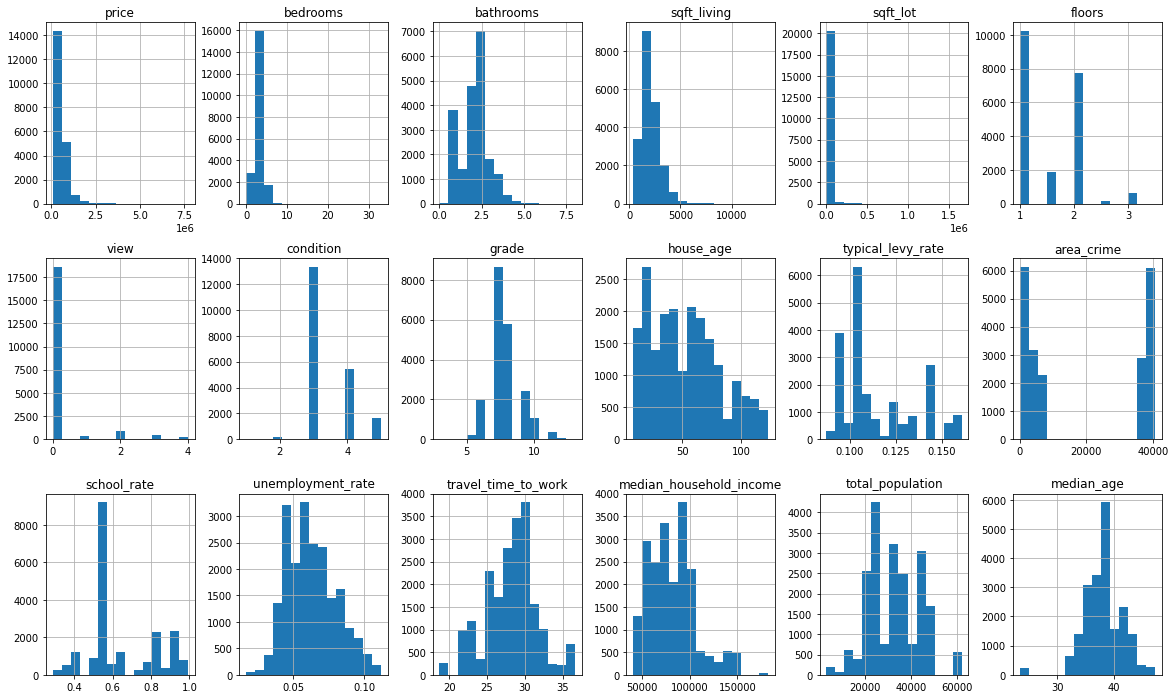

In [11]:
#Displaying histograms for each variable
df.hist(bins=15, figsize=(20,12), layout=(3, 6))
plt.show()

The houses featuring 9, 10, 11, or 33 bedrooms are not showcased in the bedroom histogram, and those with 6 to 8 bathrooms are missing from the bathroom histogram. These rows warrant a detailed investigation.

In [12]:
# draw a boxen of a categorical variable along with
# how it effects the target variable which is in this case 'price'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.boxenplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})

# draw the countplot of a categorical variable
def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x=df[feature])
    ax.set_title(f'{feature}\'s count', fontdict={'fontsize': 18})
    
# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f'{feature}\'s distribution', fontdict={'fontsize': 18})

# draw scatter plot for a numeric feature vs price
def draw_numeric_target_scatter(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})
    plt.grid(True)

Consider 'grade,' 'view,' 'floors,' 'bedrooms,' and 'bathrooms' as categorical data to better understand how these features impact house pricing

In [13]:
# extract categorical and numerical features
cate_features = ['city', 'condition','grade','view','floors','bedrooms','bathrooms']
numeric_features = list(set(df.columns)  - set(cate_features))

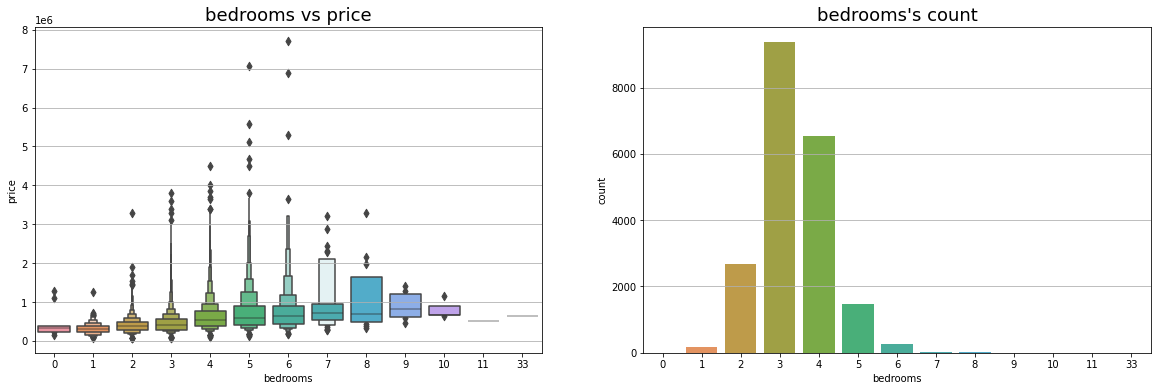

In [14]:
# draw a boxen plot of bedrooms vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[5])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[5])
plt.show()

In [15]:
# Create a mask that identifies rows where the "bedrooms" column is either 0, 9, 10, 11 or 33
mask = df['bedrooms'].isin([ 0, 9, 10, 11, 33])

# Use the mask to select rows
result_df = df[mask]

# Sort the resulting DataFrame by the "bathrooms" column
result_df = result_df.sort_values(by='bedrooms')

result_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
19561,139950.0,0,0.00,844,4269,1.0,0,4,7,110,Auburn,0.1416,4235.0,0.481552,0.071,29.8,71555.0,32194.0,39.3
1457,1095000.0,0,0.00,3064,4764,3.5,2,3,7,33,Seattle,0.1029,40649.0,0.534146,0.046,25.0,68109.0,23655.0,33.6
1644,288000.0,0,1.50,1430,1650,3.0,0,3,7,24,Seattle,0.1029,40649.0,0.534146,0.066,27.6,52353.0,39254.0,37.6
4760,228000.0,0,1.00,390,5900,1.0,0,2,4,70,Seattle,0.1029,40649.0,0.534146,0.102,29.6,53415.0,44839.0,37.9
18758,355000.0,0,0.00,2460,8049,2.0,0,3,8,33,Kent,0.1320,6169.0,0.392997,0.085,30.7,67793.0,36390.0,35.8
8200,1295650.0,0,0.00,4810,28008,2.0,0,3,12,33,Redmond,0.1091,1745.0,0.915410,0.057,29.0,119637.0,21185.0,41.8
10681,339950.0,0,2.50,2290,8319,2.0,0,3,8,38,Kent,0.1414,6243.0,0.400372,0.061,31.9,88006.0,44894.0,39.3
13299,240000.0,0,2.50,1810,5669,2.0,0,3,7,20,Maple Valley,0.1607,366.0,0.908817,0.071,36.1,93573.0,34362.0,38.7
16321,380000.0,0,0.00,1470,979,3.0,2,3,8,17,Seattle,0.0927,37754.0,0.528030,0.065,29.1,53836.0,46329.0,38.3
3301,1280000.0,9,4.50,3650,5000,2.0,0,3,8,108,Seattle,0.1029,40649.0,0.534146,0.082,23.1,47474.0,45515.0,23.3


The house with 11 bedrooms is paired with 3 bathrooms and a living area of 3000 sqft, which seems insufficient for the number of bedrooms. Similarly, the house with 33 bedrooms has only 1.75 bathrooms and a living area of just 1620 sqft. These configurations not only seem highly impractical but almost impossible, indicating potential errors in data reporting.

Furthermore, we have rows (1457, 8200, 16321, 18758, and 19561) reporting properties with 0 bedrooms and 0 bathrooms, yet substantial living spaces ranging from 844 to 4810 sqft. This is unusual because spaces of these sizes would generally be expected to house several rooms, including at least one bedroom and bathroom. There are also other rows reporting 0 bedrooms but with one or more bathrooms, which represent irregular and unlikely property configurations.

Therefore, to maintain the integrity and reliability of the dataset, it would be a great idea to remove the rows where the number of bedrooms is either 0, 11, or 33.

In [16]:
#remove the rows where the number of bedrooms is either 0, 11, or 33.
df=df[~df['bedrooms'].isin([0, 11, 33])]
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,437500.0,3,2.25,1970,35100,2.0,0,4,9,46,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7
1,630000.0,4,2.75,2710,37277,2.0,0,3,9,23,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7
2,379880.0,3,2.50,1650,14054,1.0,0,4,7,37,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7


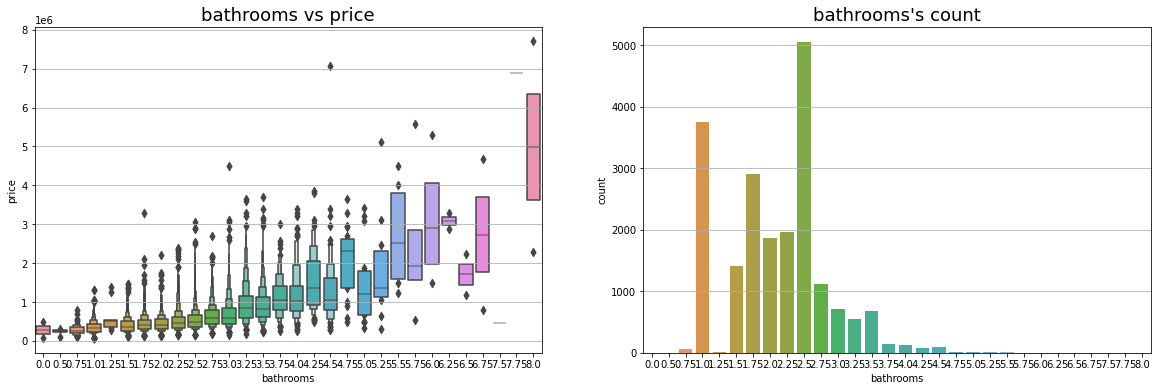

In [17]:
# draw a boxen plot of bathrooms vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[6])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[6])
plt.show()

In [18]:
# Create a mask that identifies rows where the "bathrooms" column is either  6, 0, 8, 6.75, 6.25, 6.5, 7.5, 7.75
mask = df['bathrooms'].isin([ 6, 0, 8, 6.75, 6.25, 6.5, 7.5, 7.75])

# Use the mask to select rows
result_df = df[mask]
# Sort the resulting DataFrame by the "bathrooms" column
result_df_sorted = result_df.sort_values(by='bathrooms')
result_df_sorted

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
8319,484000.0,1,0.00,690,23244,1.0,0,4,7,75,Redmond,0.1091,1745.0,0.915410,0.057,29.0,119637.0,21185.0,41.8
11960,280000.0,1,0.00,600,24501,1.0,0,2,3,73,North Bend,0.1264,252.0,0.619166,0.035,28.9,87470.0,14635.0,41.1
20504,75000.0,1,0.00,670,43377,1.0,0,3,3,57,Enumclaw,0.1259,327.0,0.529106,0.064,34.1,62842.0,21567.0,42.9
7397,2150000.0,8,6.00,4340,9415,2.0,0,3,8,56,Bellevue,0.0952,4606.0,0.831001,0.055,18.8,100344.0,32587.0,37.8
20454,5300000.0,6,6.00,7390,24829,2.0,4,4,12,32,Mercer Island,0.0874,545.0,0.870458,0.056,23.2,126106.0,24120.0,45.3
11915,1488000.0,5,6.00,6880,279968,2.0,3,3,12,16,North Bend,0.1264,252.0,0.619166,0.035,28.9,87470.0,14635.0,41.1
14193,3635000.0,5,6.00,5490,19897,2.0,0,3,12,18,Medina,0.0938,70.0,0.977396,0.017,18.7,182308.0,3120.0,45.4
5085,2888000.0,5,6.25,8670,64033,2.0,4,3,13,58,Seattle,0.1029,40649.0,0.534146,0.049,29.7,90758.0,19328.0,47.4
6706,3300000.0,5,6.25,8020,21738,2.0,0,3,11,22,Bellevue,0.0952,4606.0,0.831001,0.067,25.6,111216.0,37519.0,42.6
17644,1180000.0,6,6.50,6260,10955,2.0,0,3,11,16,Sammamish,0.1095,392.0,0.914960,0.030,31.3,150301.0,23363.0,38.3


Houses with 1 bedroom but no bathrooms are uncommon; generally, even a 1-bedroom house would have at least one bathroom to be considered habitable.

Separately, there is a property listed with 9 bedrooms and 7.5 bathrooms, all encompassed within a 4050 sqft living area. This configuration seems highly impractical, as the living conditions would likely be extremely cramped given the high number of bedrooms relative to the living space.

Therefore, to maintain the integrity and reliability of the dataset, it would a great idea to remove rows that report properties with zero bathrooms, as well as those with implausibly high bedroom-to-living-space ratios

In [19]:
#remove the rows where the number of bathrooms is 0.
df=df[~df['bathrooms'].isin([0, 7.5])]
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,437500.0,3,2.25,1970,35100,2.0,0,4,9,46,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7
1,630000.0,4,2.75,2710,37277,2.0,0,3,9,23,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7
2,379880.0,3,2.50,1650,14054,1.0,0,4,7,37,Issaquah,0.1137,1079.0,0.850382,0.051,28.6,102760.0,27855.0,41.7


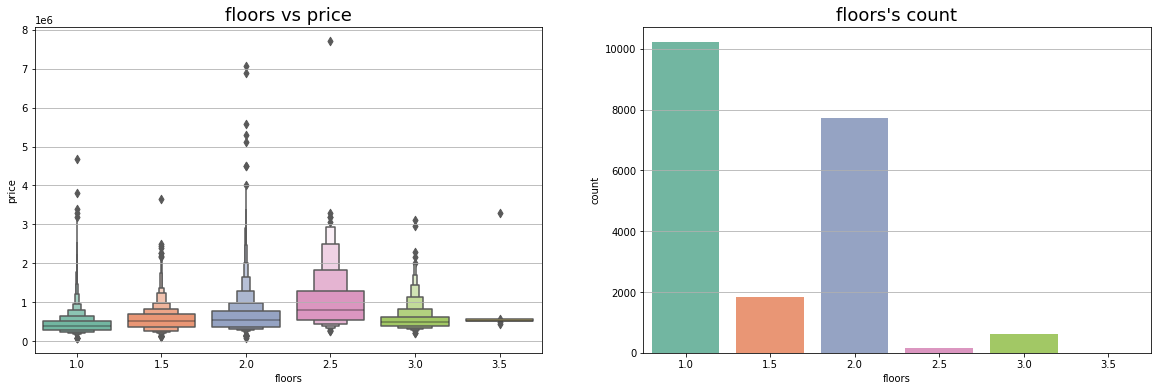

In [20]:
# draw a boxen plot of floors vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[4])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[4])
plt.show()

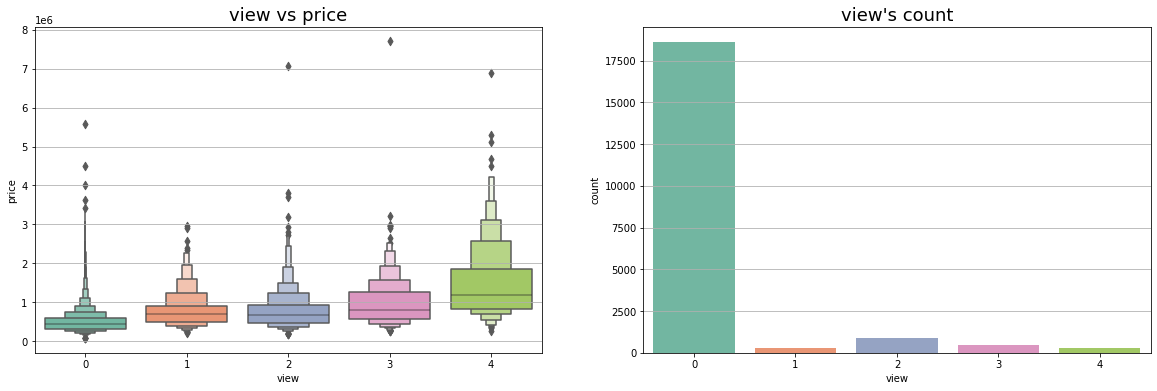

In [21]:
# draw a boxen plot of views vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[3])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[3])
plt.show()

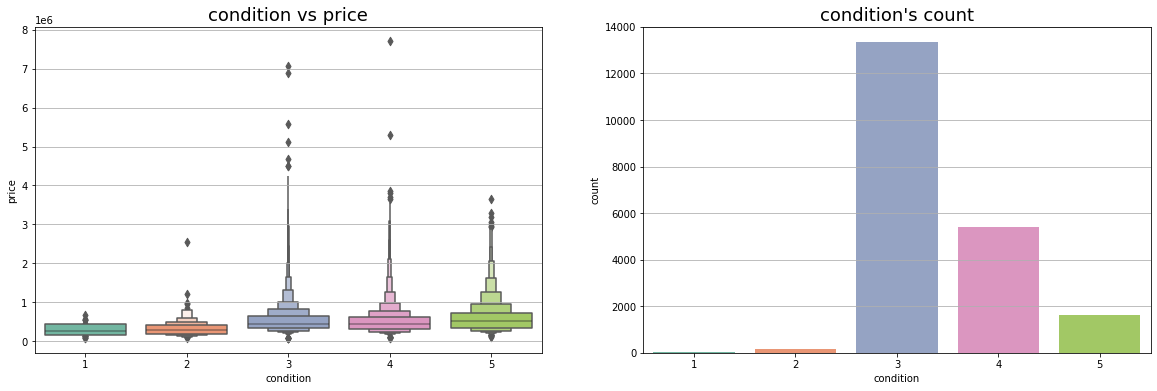

In [22]:
# draw a boxen plot of condition vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[1])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[1])
plt.show() 

In [23]:
# Create a mask that identifies rows where the "condtion" column is 1
mask = df['condition']==1

# Use the mask to select rows
result_df = df[mask]
result_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
889,125000.0,3,1.00,1230,4800,1.5,0,1,6,107,Seattle,0.1029,40649.0,0.534146,0.044,26.8,91199.0,31921.0,40.5
1056,125000.0,1,1.00,500,7440,1.0,0,1,5,95,Seattle,0.1029,40649.0,0.534146,0.090,27.4,53949.0,24603.0,36.1
3041,130000.0,3,1.00,1200,7000,2.0,0,1,7,115,Seattle,0.1029,40649.0,0.534146,0.043,28.8,73667.0,23968.0,42.5
4275,352950.0,3,1.00,1760,3000,1.5,0,1,6,123,Seattle,0.1029,40649.0,0.534146,0.047,25.3,76925.0,48600.0,33.9
4536,432500.0,6,2.00,3080,5500,2.0,0,1,7,123,Seattle,0.1029,40649.0,0.534146,0.058,24.7,55725.0,35052.0,31.4
4546,575000.0,1,1.00,1310,8667,1.5,0,1,6,105,Seattle,0.1029,40649.0,0.534146,0.058,24.7,55725.0,35052.0,31.4
4553,441000.0,4,1.50,1100,3300,1.0,0,1,7,104,Seattle,0.1029,40649.0,0.534146,0.058,24.7,55725.0,35052.0,31.4
4668,227000.0,3,1.75,2380,12681,1.0,0,1,6,105,Seattle,0.1029,40649.0,0.534146,0.102,29.6,53415.0,44839.0,37.9
4902,427000.0,4,1.00,1860,4736,1.5,0,1,7,122,Seattle,0.1029,40649.0,0.534146,0.066,22.1,100694.0,22230.0,39.9
5469,78000.0,2,1.00,780,16344,1.0,0,1,5,81,Seattle,0.1029,40649.0,0.534146,0.112,26.6,50054.0,32569.0,36.2


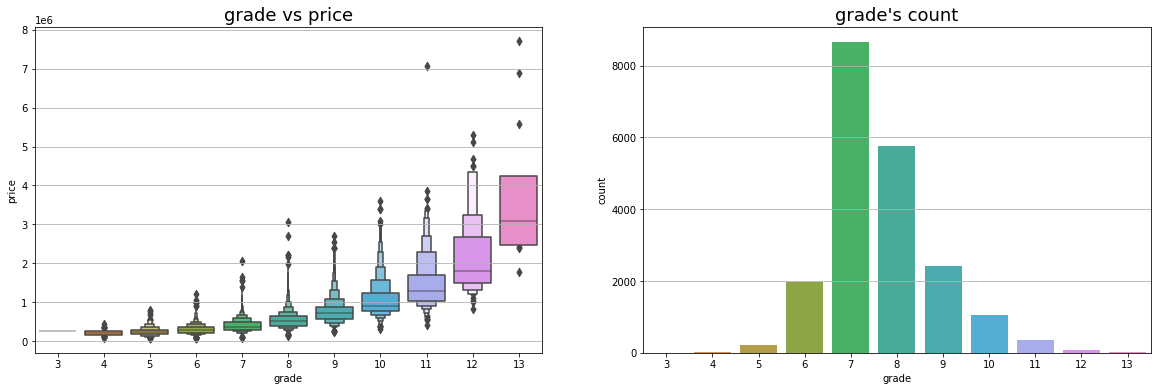

In [24]:
# draw a boxen plot of grade vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[2])

plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[2])
plt.show()

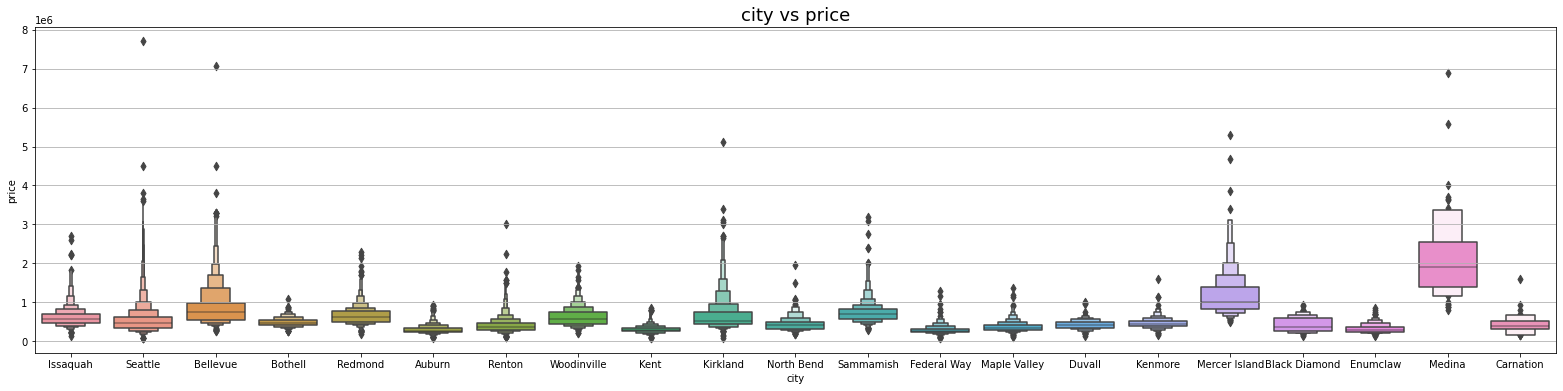

In [25]:
# draw a boxen plot of city vs price
plt.figure(figsize=(60, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(df, cate_features[0])

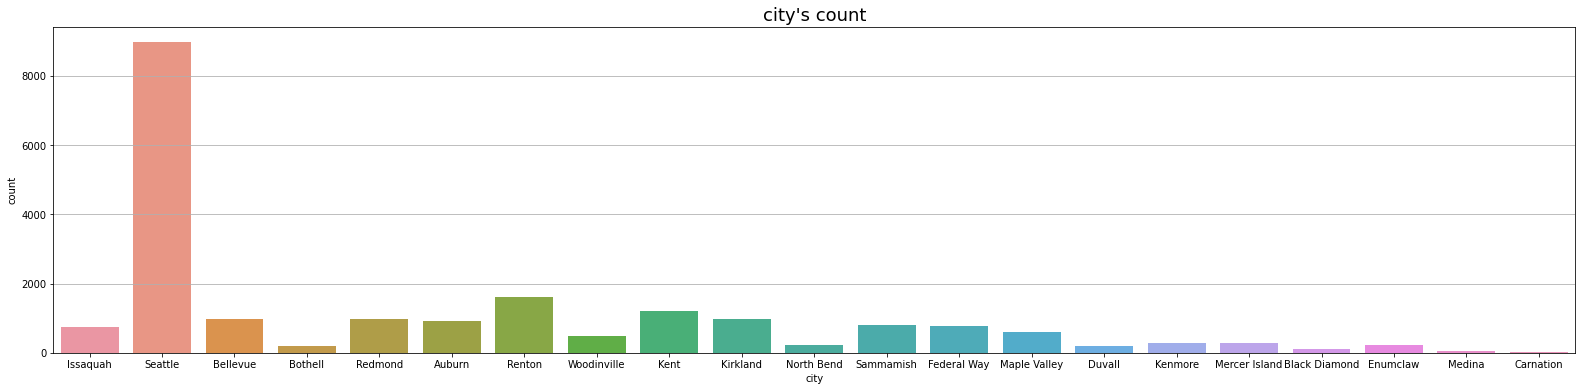

In [26]:
plt.figure(figsize=(60, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 2)
draw_cate_countplot(df, cate_features[0])
plt.show() 

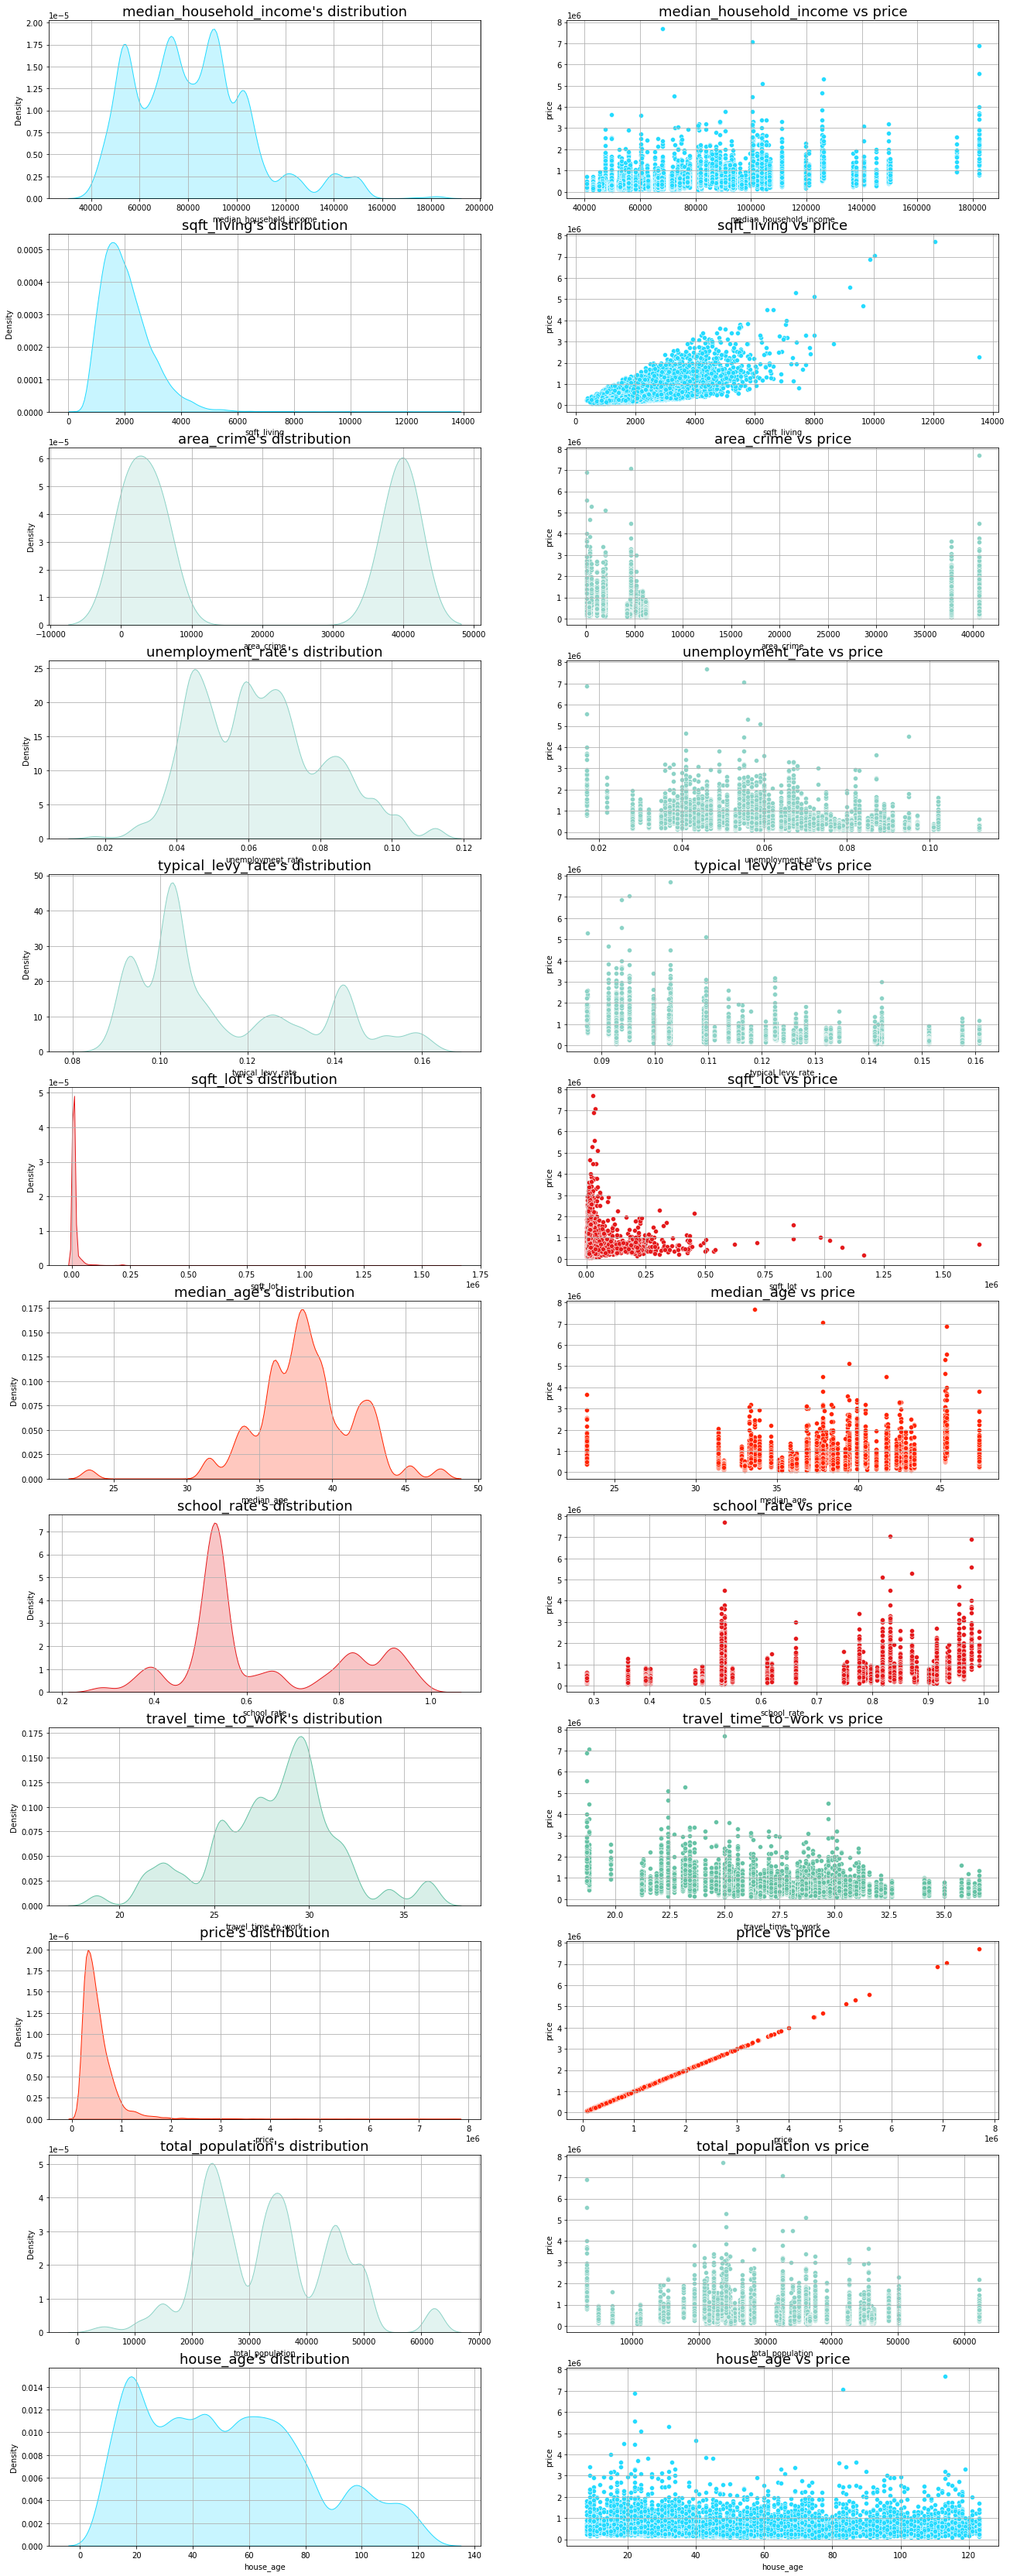

In [27]:
# draw some plots for all numeric features [+ vs price]
plt.figure(figsize=(22, 60))

palettes = ['Set1', 'Set2', 'Set3', 'autumn', 'cool']
for i, feature in enumerate(numeric_features):
    sns.set_palette(random.choice(palettes))
    # distribution
    plt.subplot(len(numeric_features), 2, i+i+1)
    draw_numeric_dist(df, feature)
    # scatter
    plt.subplot(len(numeric_features), 2, i+i +2)
    draw_numeric_target_scatter(df, feature)
    
plt.show()

### Step 4 Data Transformation

In [28]:
# convert the selected columns to object data type
df.loc[:, ['bedrooms', 'bathrooms', 'condition', 'grade', 'view', 'floors']] = df.loc[:, ['bedrooms', 'bathrooms', 'condition', 'grade', 'view', 'floors']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20559 entries, 0 to 20573
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    20559 non-null  float64
 1   bedrooms                 20559 non-null  object 
 2   bathrooms                20559 non-null  object 
 3   sqft_living              20559 non-null  int64  
 4   sqft_lot                 20559 non-null  int64  
 5   floors                   20559 non-null  object 
 6   view                     20559 non-null  object 
 7   condition                20559 non-null  object 
 8   grade                    20559 non-null  object 
 9   house_age                20559 non-null  int64  
 10  city                     20559 non-null  object 
 11  typical_levy_rate        20559 non-null  float64
 12  area_crime               20559 non-null  float64
 13  school_rate              20559 non-null  float64
 14  unemployment_rate        20

https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa#:~:text=If%20the%20skewness%20is%20between%20%2D1%20and%20%2D0.5(negatively,the%20data%20are%20highly%20skewed.


In [29]:
# Loop through each column in the dataframe
for column in df.columns:

    # Check if the column contains numerical data
    if df[column].dtype == "float64" or df[column].dtype == "int64":

        # Calculate the skewness of the column
        skewness = skew(df[column])

         # Check the skewness value and print the appropriate message
        if skewness <= -1:
            print(column, "has highly negative skewness")
        elif -1 < skewness <= -0.5:
            print(column, "has moderately negative skewness")
        elif -0.5 < skewness < 0.5:
            print(column, "is approximately symmetric")
        elif 0.5 <= skewness < 1:
            print(column, "has moderately positive skewness")
        elif skewness >= 1:
            print(column, "has highly positive skewness")

price has highly positive skewness
sqft_living has highly positive skewness
sqft_lot has highly positive skewness
house_age is approximately symmetric
typical_levy_rate has moderately positive skewness
area_crime is approximately symmetric
school_rate is approximately symmetric
unemployment_rate is approximately symmetric
travel_time_to_work is approximately symmetric
median_household_income has moderately positive skewness
total_population is approximately symmetric
median_age has moderately negative skewness


Since taxtypical_levy_rate, median_household_income, and median_age have moderately positive skewness, we need to apply square root transformation method for those variables. Additionally, price, sqft_living, and sqft_lot have highly positive  skewed, we need to apply log transformation method for those variables.

In [30]:
transf_df=df.copy()

#Apply square root transformation
transf_df['typical_levy_rate_sqrt'] = np.sqrt(transf_df['typical_levy_rate'])
transf_df['median_household_income_sqrt'] = np.sqrt(transf_df['median_household_income'])
transf_df['median_age_sqrt'] = np.sqrt(transf_df['median_age'])

#Apply logarithmic( log10)
transf_df['price_log'] = np.log10(transf_df['price'])
transf_df['sqft_living_log'] = np.log10(transf_df['sqft_living'])
transf_df['sqft_lot_log'] = np.log10(transf_df['sqft_lot'])

transf_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,...,travel_time_to_work,median_household_income,total_population,median_age,typical_levy_rate_sqrt,median_household_income_sqrt,median_age_sqrt,price_log,sqft_living_log,sqft_lot_log
0,437500.0,3,2.25,1970,35100,2.0,0,4,9,46,...,28.6,102760.0,27855.0,41.7,0.337194,320.562006,6.457554,5.640978,3.294466,4.545307
1,630000.0,4,2.75,2710,37277,2.0,0,3,9,23,...,28.6,102760.0,27855.0,41.7,0.337194,320.562006,6.457554,5.799341,3.432969,4.571441
2,379880.0,3,2.5,1650,14054,1.0,0,4,7,37,...,28.6,102760.0,27855.0,41.7,0.337194,320.562006,6.457554,5.579646,3.217484,4.147800
3,525888.0,5,1.75,2550,71874,1.0,0,5,7,63,...,28.6,102760.0,27855.0,41.7,0.337194,320.562006,6.457554,5.720893,3.406540,4.856572
4,410000.0,3,2.25,1800,36704,1.0,0,4,8,45,...,28.6,102760.0,27855.0,41.7,0.337194,320.562006,6.457554,5.612784,3.255273,4.564713


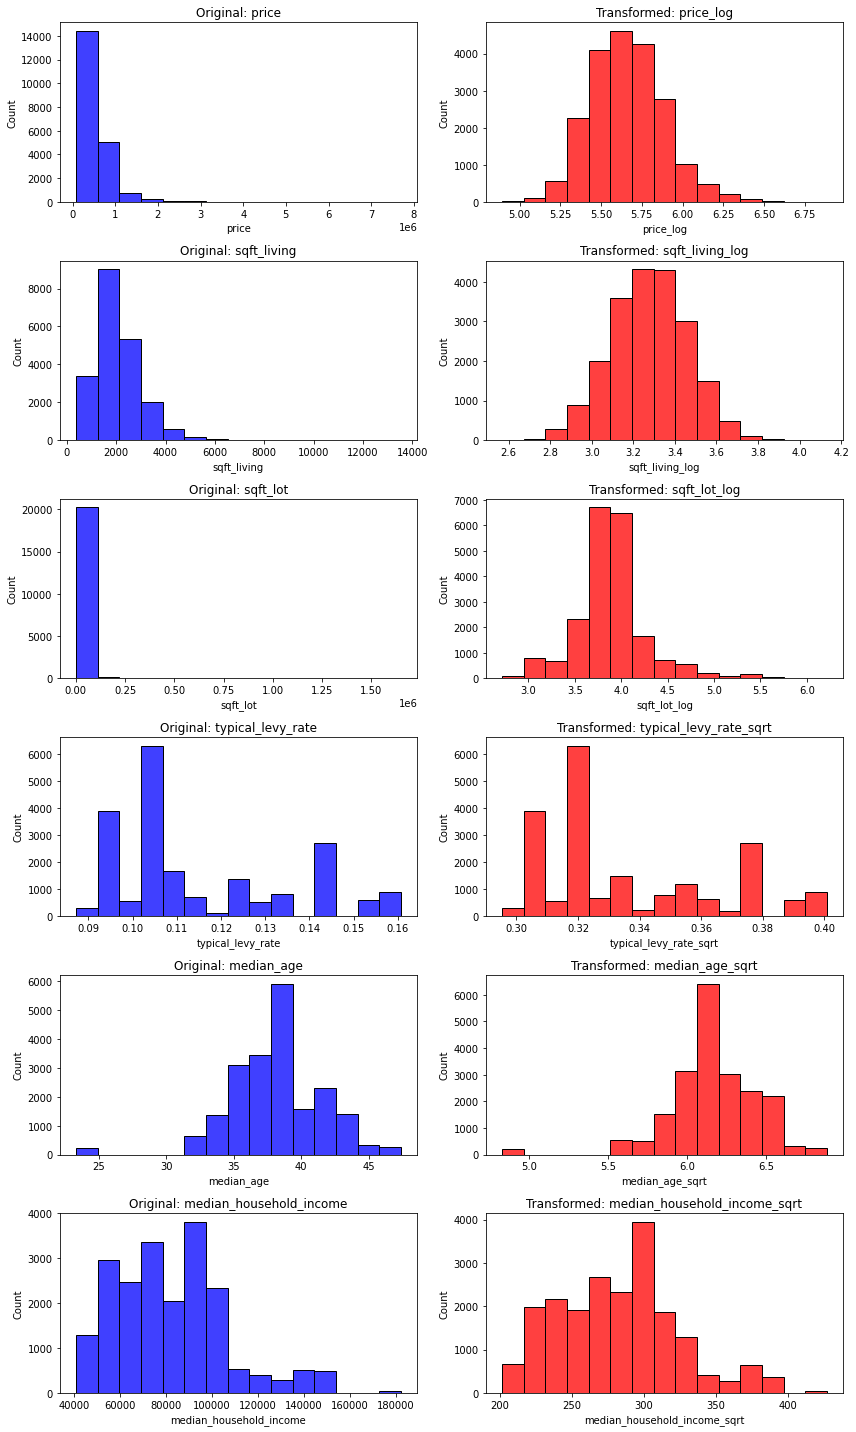

In [31]:
# List of column pairs (original and transformed)
column_pairs = [
    ('price', 'price_log'),
    ('sqft_living', 'sqft_living_log'),
    ('sqft_lot', 'sqft_lot_log'),
    ('typical_levy_rate', 'typical_levy_rate_sqrt'),
    ('median_age', 'median_age_sqrt'),
    ('median_household_income', 'median_household_income_sqrt'),
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(column_pairs), ncols=2, figsize=(12, 20))

# Loop through each pair of columns and create histograms
for i, (col_orig, col_trans) in enumerate(column_pairs):
    sns.histplot(transf_df[col_orig], bins=15, color='blue', ax=axes[i, 0])
    sns.histplot(transf_df[col_trans], bins=15, color='red', ax=axes[i, 1])
    
    axes[i, 0].set_title(f'Original: {col_orig}')
    axes[i, 1].set_title(f'Transformed: {col_trans}')

# Adjust layout
plt.tight_layout()
plt.show()


After analyzing the histograms of typical_levy_rate_sqrt, median_age_sqrt, and median_household_income_sqrt, it is evident that their distributions did not exhibit a significant improvement in symmetry. Therefore, we have decided not to include those variables in my future studies.

However, upon observing the histograms of price_log, sqft_living_log, and sqft_lot_log. I noticed that thoese distribution have become more symmetric when they compared to the distribution of pric, sqft_living, and sqft_log. Consequently, I will use sqft_living_log, and sqft_lot_log. for my further modeling.

In [32]:
transf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20559 entries, 0 to 20573
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         20559 non-null  float64
 1   bedrooms                      20559 non-null  object 
 2   bathrooms                     20559 non-null  object 
 3   sqft_living                   20559 non-null  int64  
 4   sqft_lot                      20559 non-null  int64  
 5   floors                        20559 non-null  object 
 6   view                          20559 non-null  object 
 7   condition                     20559 non-null  object 
 8   grade                         20559 non-null  object 
 9   house_age                     20559 non-null  int64  
 10  city                          20559 non-null  object 
 11  typical_levy_rate             20559 non-null  float64
 12  area_crime                    20559 non-null  float64
 13  school

In [33]:
df= transf_df[[ 'price_log', 'city', 'condition','grade', 'view','floors','bedrooms','bathrooms', 'sqft_living_log','sqft_lot_log',
                  'house_age', 'school_rate','unemployment_rate', 'travel_time_to_work',
                  'total_population', 'typical_levy_rate', 'median_age', 'median_household_income', 'area_crime'
                    ]]
df.head()

,price_log,city,condition,grade,view,floors,bedrooms,bathrooms,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,Issaquah,4,9,0,2.0,3,2.25,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,Issaquah,3,9,0,2.0,4,2.75,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,Issaquah,4,7,0,1.0,3,2.5,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
3,5.720893,Issaquah,5,7,0,1.0,5,1.75,3.406540,4.856572,63,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
4,5.612784,Issaquah,4,8,0,1.0,3,2.25,3.255273,4.564713,45,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0


In [34]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 177 to 16016
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                7 non-null      float64
 1   city                     7 non-null      object 
 2   condition                7 non-null      object 
 3   grade                    7 non-null      object 
 4   view                     7 non-null      object 
 5   floors                   7 non-null      object 
 6   bedrooms                 7 non-null      object 
 7   bathrooms                7 non-null      object 
 8   sqft_living_log          7 non-null      float64
 9   sqft_lot_log             7 non-null      float64
 10  house_age                7 non-null      int64  
 11  school_rate              7 non-null      float64
 12  unemployment_rate        7 non-null      float64
 13  travel_time_to_work      7 non-null      float64
 14  total_population         7 no

In [35]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20552 entries, 0 to 20573
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                20552 non-null  float64
 1   city                     20552 non-null  object 
 2   condition                20552 non-null  object 
 3   grade                    20552 non-null  object 
 4   view                     20552 non-null  object 
 5   floors                   20552 non-null  object 
 6   bedrooms                 20552 non-null  object 
 7   bathrooms                20552 non-null  object 
 8   sqft_living_log          20552 non-null  float64
 9   sqft_lot_log             20552 non-null  float64
 10  house_age                20552 non-null  int64  
 11  school_rate              20552 non-null  float64
 12  unemployment_rate        20552 non-null  float64
 13  travel_time_to_work      20552 non-null  float64
 14  total_population         20

In [37]:
df.to_csv('/Users/candicewu/Desktop/cleaned_dataset.csv', index=False)